# W6 G5 Interpreting t-SNE and UMAP Plots

C.Sindland, D.Odd, E.Odinsen, J.Jacobo, J.Schmidt, N.Piiter, Q.Xu, V.Krishna

TK8117, NTNU


# Motivation Context
- High-dimensional data is hard to visualize.
- Need for dimensionality reduction techniques.

t-SNE: Stochastic neighbor embedding technique which preserves local structure. It is good for cluster visualization, but sensitive to parameters like perplexity and learning rate.

UMAP: Based on manifold learning and topological data analysis.It preserves both local and global structure. Faster and more scalable than t-SNE.

Imagine a huge, dark party with:

50 boys scattered around
Girls standing in 3 clear groups across the room
Each boy wants to find which group of girls to approach
The Problem: It's too dark to see the whole room at once!

#t-SNE Method

-t-SNE is like each boy only caring about his immediate neighbors

-He looks around and thinks: "I need to stand close to the people near me right now"

-He doesn't care about the overall room layout - just his little circle
What happens:

Boys end up forming tight, clear groups around the girls
But the distances between groups are meaningless - one group might be in the corner just because there was space there
The overall room shape gets completely distorted

#t-SNE's : "Find my local friends, ignore the big picture"

#UMAP Method
-UMAP is like each boy making a mental map of the entire room

-He thinks: "I want to be near my friends, but I also care about the overall party layout"

-He preserves both local friendships AND the global room structure
What happens:

Boys still form clear groups around girls
But the distances between groups actually mean something
If two groups are close on the map, they're genuinely similar
The overall room shape is mostly preserved

#UMAP's: "Find my friends while keeping the big picture accurate"

t-SNE = "Show me who's in which group, I don't care about distances between groups"

UMAP = "Show me the groups AND how they relate to each other"

In [ ]:
import pandas as pd

# Create a comparison table
data = {
    "Feature": [
        "Local Structure",
        "Global Structure",
        "Speed",
        "Interpretability",
        "Parameters"
    ],
    "t-SNE": [
        "✅ Excellent",
        "❌ Poor",
        "🐢 Slower",
        "Moderate",
        "perplexity, learning rate"
    ],
    "UMAP": [
        "✅ Excellent",
        "✅ Better",
        "🚀 Faster",
        "Moderate",
        "n_neighbors, min_dist"
    ]
}

df_comparison = pd.DataFrame(data)
df_comparison.set_index("Feature", inplace=True)
df_comparison


,t-SNE,UMAP
Feature,,
Local Structure,✅ Excellent,✅ Excellent
Global Structure,❌ Poor,✅ Better
Speed,🐢 Slower,🚀 Faster
Interpretability,Moderate,Moderate
Parameters,"perplexity, learning rate","n_neighbors, min_dist"


# Example

t-SNE and UMAP plots using the Digits dataset (64-dimensional data representing handwritten digits from 0 to 9).

## Interpretation Tips

- Clusters = similar data points.
- Distance ≠ always meaningful globally.
- Use with caution for quantitative conclusions.

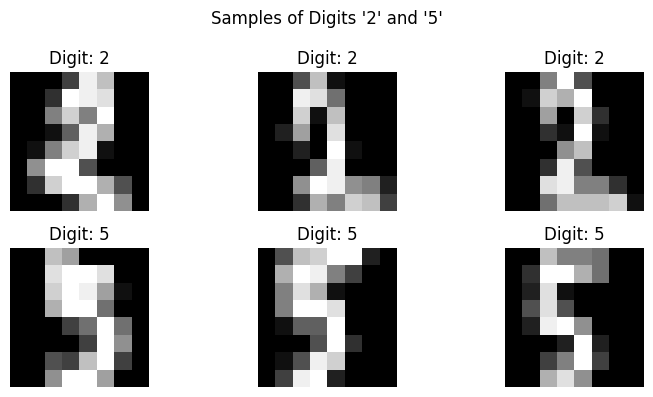

In [ ]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Find indices of digits '2' and '5'
indices_2 = [i for i, label in enumerate(digits.target) if label == 2][:3]
indices_5 = [i for i, label in enumerate(digits.target) if label == 5][:3]

# Combine selected indices
selected_indices = indices_2 + indices_5

# Create a plot
plt.figure(figsize=(8, 4))
for i, idx in enumerate(selected_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    plt.title(f"Digit: {digits.target[idx]}")
    plt.axis('off')

plt.suptitle("Samples of Digits '2' and '5'")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


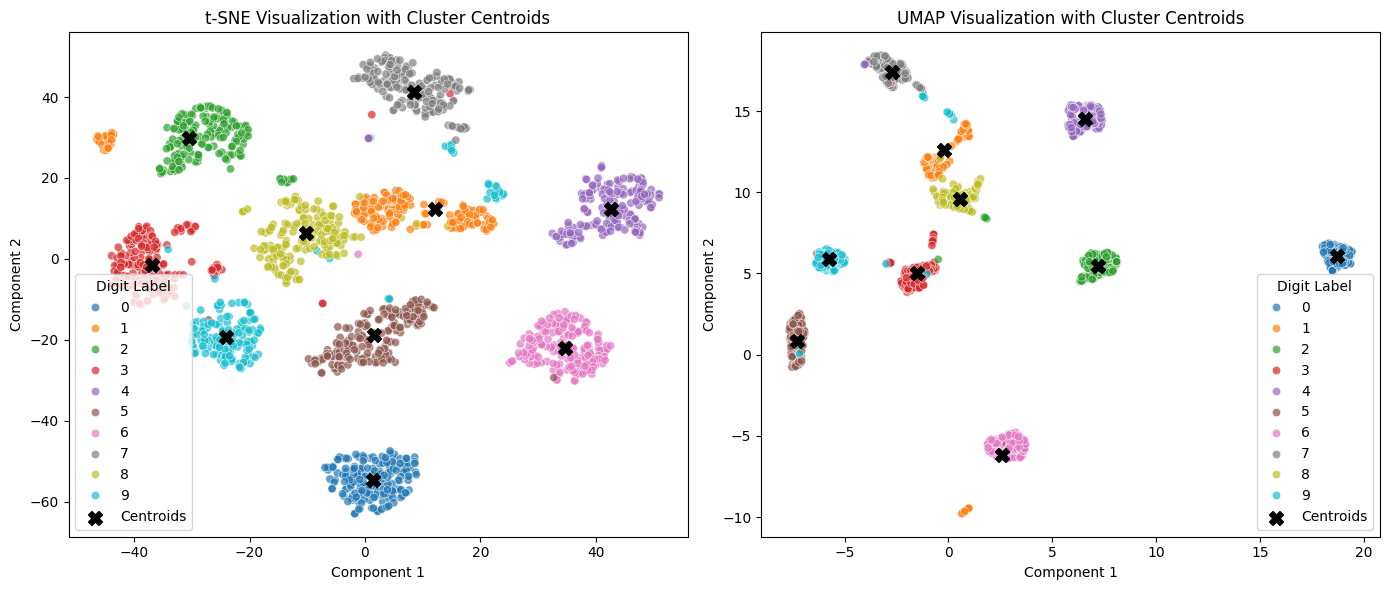

In [ ]:

import seaborn as sns
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
import numpy as np

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
#Perplexity = 30 and n_iter = 1000 by def.
X_tsne = tsne.fit_transform(X)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
# n_neighbors = 15, min_dist = 0.1, metric = euclidean by def.
X_umap = umap_model.fit_transform(X)

# Cluster the data using KMeans for annotation
kmeans_tsne = KMeans(n_clusters=10, random_state=42).fit(X_tsne)
kmeans_umap = KMeans(n_clusters=10, random_state=42).fit(X_umap)

# Plot t-SNE with cluster centroids
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', legend='full', alpha=0.7)
plt.scatter(kmeans_tsne.cluster_centers_[:, 0], kmeans_tsne.cluster_centers_[:, 1],
            c='black', marker='X', s=100, label='Centroids')
plt.title('t-SNE Visualization with Cluster Centroids')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Digit Label')

# Plot UMAP with cluster centroids
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', legend='full', alpha=0.7)
plt.scatter(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1],
            c='black', marker='X', s=100, label='Centroids')
plt.title('UMAP Visualization with Cluster Centroids')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Digit Label')

plt.tight_layout()
plt.show()


# How to Interpret the Plots above (example UMAP vs t-SNE)

- Each point represents a digit image (flattened into 64 features).
- Colors indicate the true digit label (0–9).
- Clusters show how similar digits group together in the reduced space.
- Centroids (black Xs) are the centers of clusters found by KMeans.


In theory:
- t-SNE emphasizes local structure. Distance between clusters does not mean anything.
- UMAP preserves both local and global structure (more meaningful distances between clusters).

But, cant really see that in the example above..

\# t-SNE hyperparameter effects on plots


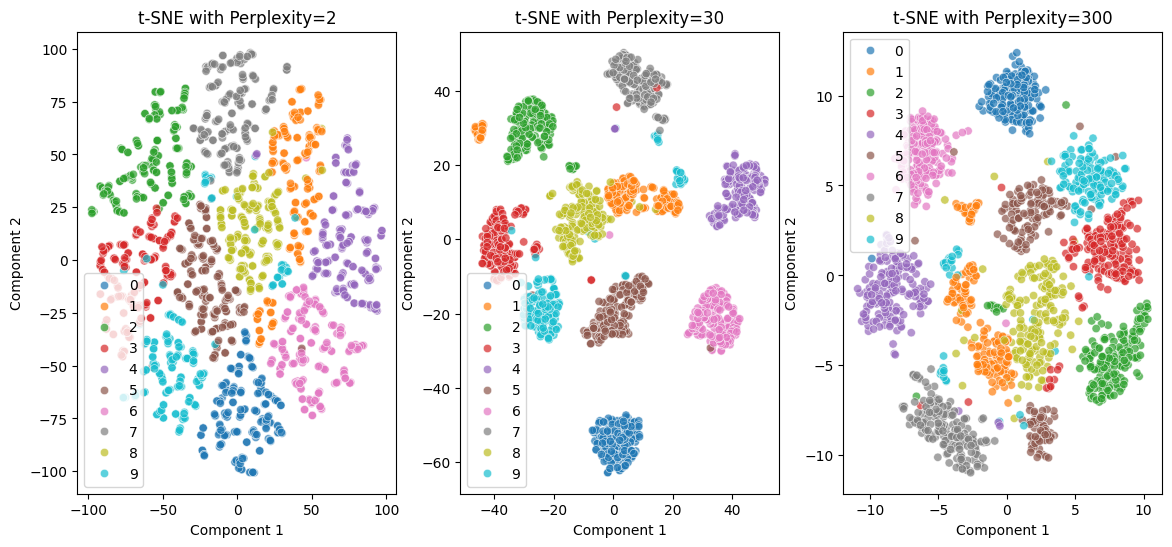

In [ ]:
# Three t-SNE plots with different perplexity (increasing perlexity --> retains more non-local information )
X = digits.data
y = digits.target


perplexitys = [2, 30, 300]


maps = {}
# Apply t-SNE
for perplexity in perplexitys:
  tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
  X_tsne = tsne.fit_transform(X)
  maps[perplexity] = X_tsne

plt.figure(figsize=(14, 6))
for i, map in enumerate(maps.values()):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=map[:, 0], y=map[:, 1], hue=y, palette='tab10', alpha=0.7)
    plt.title(f't-SNE with Perplexity={perplexitys[i]}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    # plt.legend(title='Digit Label')

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


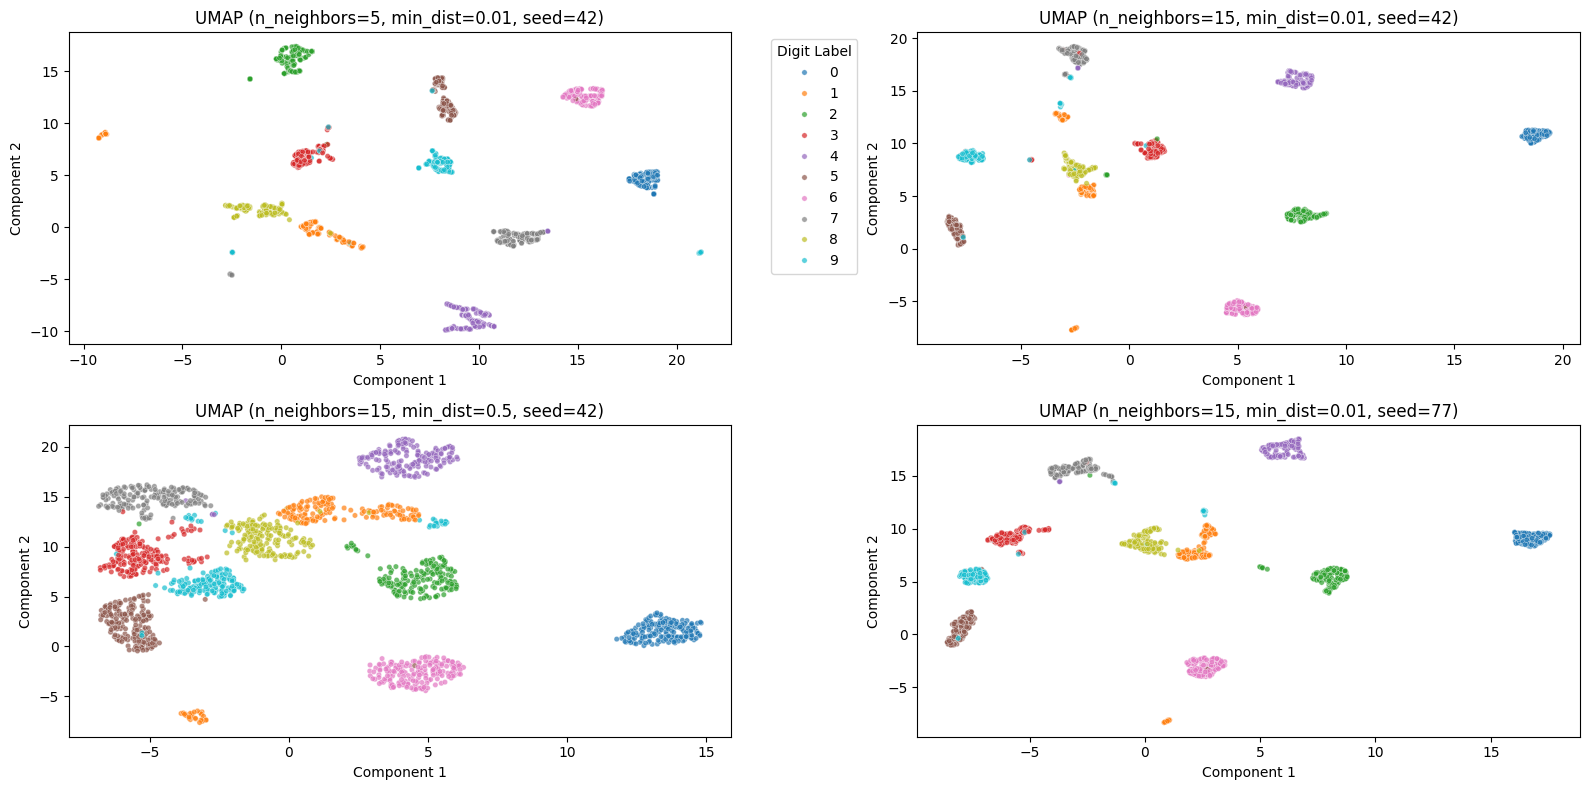

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Define UMAP configurations (default seed = 42)
configs = [
    {"n_neighbors": 5, "min_dist": 0.01, "random_state": 42},
    {"n_neighbors": 15, "min_dist": 0.01, "random_state": 42},
    {"n_neighbors": 15, "min_dist": 0.5, "random_state": 42}
]

# Dictionary to store embeddings
maps = {}
for cfg in configs:
    umap_model = umap.UMAP(
        n_components=2,
        n_neighbors=cfg["n_neighbors"],
        min_dist=cfg["min_dist"],
        random_state=cfg["random_state"]
    )
    X_umap = umap_model.fit_transform(X)
    label = f"UMAP (n_neighbors={cfg['n_neighbors']}, min_dist={cfg['min_dist']}, seed={cfg['random_state']})"
    maps[label] = X_umap

# Add one example with a different seed (77)
umap_diff_seed = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=77
)
X_umap_diff_seed = umap_diff_seed.fit_transform(X)
maps["UMAP (n_neighbors=15, min_dist=0.01, seed=77)"] = X_umap_diff_seed

# Plot results
plt.figure(figsize=(16, 8))
for i, (label, embedding) in enumerate(maps.items()):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=y,
        palette="tab10",
        alpha=0.7,
        s=15,
        legend="full"
    )
    plt.title(label)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    if i == 0:  # only show legend once for clarity
        plt.legend(title="Digit Label", bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


# Comparsion between t-SNE and UMAP

In [ ]:
!pip install umap-learn


import os, time, numpy as np, matplotlib.pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# =================
# COIL-20 Download & Preprocessing
# =================
!wget http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip
!unzip -o coil-20-proc.zip -d coil20_data

def load_coil20(data_dir='coil20_data/coil-20-proc'):
    images, labels = [], []
    for fname in sorted(os.listdir(data_dir)):
        if fname.endswith('.png'):
            label = int(fname.split('__')[0][3:])    # object ID
            img = np.array(Image.open(os.path.join(data_dir, fname)).convert('L')).flatten()
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

X_coil20, y_coil20 = load_coil20()



--2025-10-10 07:45:43--  http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip
Resolving www.cs.columbia.edu (www.cs.columbia.edu)... 128.59.11.206
Connecting to www.cs.columbia.edu (www.cs.columbia.edu)|128.59.11.206|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip [following]
--2025-10-10 07:45:44--  https://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip
Connecting to www.cs.columbia.edu (www.cs.columbia.edu)|128.59.11.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12684276 (12M) [application/zip]
Saving to: ‘coil-20-proc.zip.2’

coil-20-proc.zip.2  100%[===================>]  12.10M  18.7MB/s    in 0.6s    

2025-10-10 07:45:45 (18.7 MB/s) - ‘coil-20-proc.zip.2’ saved [12684276/12684276]

Archive:  coil-20-proc.zip
 extracting: coil20_data/coil-20-proc/ob

In [ ]:
# ====================
# Pendigits, MNIST, Fashion MNIST loading
# ====================
pendigits = fetch_openml('pendigits', version=1)
X_pendigits, y_pendigits = pendigits.data.astype('float32'), pendigits.target.astype('int64')

mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist.data[:10000].astype('float32'), mnist.target[:10000].astype('int64')

fashion = fetch_openml('Fashion-MNIST', version=1)
X_fashion, y_fashion = fashion.data[:10000].astype('float32'), fashion.target[:10000].astype('int64')

datasets_list = [
    (X_coil20, y_coil20, 'COIL-20'),
    (X_pendigits, y_pendigits, 'Pendigits'),
    (X_mnist, y_mnist, 'MNIST'),
    (X_fashion, y_fashion, 'Fashion MNIST')
]

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:75: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


RemoteDisconnected: Remote end closed connection without response

In [ ]:
for X, y, name in datasets_list:
    print(f"Shape of {name} data (X): {X.shape}")
    print(f"Shape of {name} labels (y): {y.shape}")
    print(f"Number of classes in {name}: {len(np.unique(y))}\n")

In [ ]:
# ==========================
# Dimensionality Reduction + Time Capture
# ==========================

results_tsne = []
results_umap = []

for X, y, name in datasets_list:
    # t-SNE
    t0 = time.time()
    X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)
    tsne_time = time.time() - t0
    np.save(f"{name}_tsne.npy", X_tsne)
    np.save(f"{name}_labels.npy", y)
    results_tsne.append((name, X_tsne, y, tsne_time))
    # UMAP
    t0 = time.time()
    X_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X)
    umap_time = time.time() - t0
    np.save(f"{name}_umap.npy", X_umap)

In [ ]:
# =====================================
# Plot:  t-SNE,  UMAP, 4  (Datasets)
# =====================================
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

for i, (name, X_tsne, y, _) in enumerate(results_tsne):
    axs[0, i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=3)
    axs[0, i].set_title(f"{name}\n(t-SNE)")


for i, (name, X_umap, y, _) in enumerate(results_umap):
    axs[1, i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=3)
    axs[1, i].set_title(f"{name}\n(UMAP)")


plt.tight_layout()
plt.show()

In [ ]:
# =====================================
# Computation Time Table
# =====================================
time_results = []
for tsne, umap in zip(results_tsne, results_umap):
    name = tsne[0]
    time_results.append([name, f"{tsne[3]:.1f} sec", f"{umap[3]:.1f} sec"])
time_df = pd.DataFrame(time_results, columns=["Dataset", "t-SNE Time", "UMAP Time"])
print("Computation Time for different datasets")
print(time_df.to_string(index=False))

In [ ]:
# =====================================
# kNN Classification + Accuracy Table
# =====================================
def knn_classification(X_embedded, y, n_neighbors=5):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc_list = []
    for train_idx, test_idx in skf.split(X_embedded, y):
        X_train, X_test = X_embedded[train_idx], X_embedded[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        acc_list.append(accuracy_score(y_test, clf.predict(X_test)))
    return np.mean(acc_list), np.std(acc_list)

knn_results = {}
n_neighbors_list = [10, 20, 40, 160]

for n_neighbors in n_neighbors_list:
    knn_results[n_neighbors] = []
    for tsne, umap in zip(results_tsne, results_umap):
        name = tsne[0]
        tsne_acc, tsne_std = knn_classification(tsne[1], tsne[2], n_neighbors=n_neighbors)
        umap_acc, umap_std = knn_classification(umap[1], umap[2], n_neighbors=n_neighbors)
        knn_results[n_neighbors].append([name, f"{tsne_acc:.4f} ± {tsne_std:.4f}", f"{umap_acc:.4f} ± {umap_std:.4f}"])

# =====================================
# kNN Accuracy Table for different n_neighbors
# =====================================
print("\nkNN Accuracy Table")
print("-" * 50)

for n_neighbors, results in knn_results.items():
    print(f"\nn_neighbors = {n_neighbors}")
    print("-" * 20)
    knn_data = []
    for name, tsne_acc_std, umap_acc_std in results:
        knn_data.append([name, 2, tsne_acc_std, umap_acc_std]) # Assuming 2 components
    knn_df = pd.DataFrame(knn_data, columns=["Dataset", "Components", "t-SNE kNN Accuracy", "UMAP kNN Accuracy"])
    print(knn_df.to_string(index=False))

- The advantage of UMAP becomes more pronounced as the value of k increases, especially on larger and noisier datasets.

- UMAP achieves k-NN classification accuracy that is comparable to t-SNE for small values of k (which consider local neighborhood structure). For larger values of k (which test the preservation of more global structure in the embedding), UMAP generally outperforms t-SNE

# t-SNE
###  Pros
- Reveals complex nonlinear relationships.  
- Produces clear, distinct clusters — great for exploration.  
- Captures subtle local patterns missed by PCA.

---

###  Cons
- Distorts global structure; inter-cluster distances unreliable.  
- Slow and computationally heavy on large data.  
- Sensitive to parameters and random seed; results vary.  
- Hard to add new data (no direct transform).

# UMAP
###  Pros
- Preserves overall data topology — clusters + their connections.  
- Faster, scalable, and more reproducible than t-SNE.  
- Useful as a preprocessing step for clustering or classification.  
- Allows approximate inverse transform for interpretation.

---

###  Cons
- Needs tuning of `n_neighbors` and `min_dist`.  
- May form “bridges” between nearby clusters.  
- Slightly less visually separated than t-SNE.

#Conclusion

- Both UMAP and t-SNE are powerful tools for visualization.
- Use UMAP for speed and structure.
- Use t-SNE for detailed local clustering.
- Always combine with domain knowledge.